- Importiamo Librerie e Dataset

In [342]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

df = pd.read_csv("Training_distributionStatistic.csv")

In [343]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Engine,Trim,Transmission,...,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Model,Doors,SubModel
0,326,1,2010-10-25,ADESA,2008,2,KIA,NaN,EX,AUTO,...,10650.0,5546,33619,FL,6100.0,0,533,SPECTRA,4D,SEDAN
1,42991,0,2009-05-27,MANHEIM,2006,3,DODGE,2.7L,SXT,AUTO,...,7478.0,99750,32124,FL,4000.0,0,1630,STRATUS,4D,SEDAN
2,55273,0,2010-03-18,OTHER,2008,2,DODGE,NaN,SE,AUTO,...,11350.0,99761,74135,OK,7500.0,0,693,CALIBER,4D,WAGON
3,29058,0,2009-08-06,OTHER,2005,4,FORD,3.9L,S,AUTO,...,7691.0,99761,85018,AZ,4725.0,0,1633,FREESTAR,NaN,PASSENGER
4,34991,0,2009-04-03,MANHEIM,2005,4,CHRYSLER,V6,BAS,AUTO,...,7856.0,20833,75236,TX,5670.0,0,1623,TOWN & COUNTRY,NaN,MINIVAN


In [344]:
#controllo del numero di macchine associate a un make
print(df['Make'].nunique())
MakeCount=df['Make'].value_counts()
MakeCount.loc[df['Make'].value_counts()<15].count()

33


3

In [345]:
#queste macchine hanno solo un amacchina in tutto il database
MakeCount.loc[df['Make'].value_counts()<15]

PLYMOUTH        1
HUMMER          1
TOYOTA SCION    1
Name: Make, dtype: int64

In [346]:
#toyota scion rinominata come toyota
df['Make'].replace(['TOYOTA SCION'], ['TOYOTA'])

0              KIA
1            DODGE
2            DODGE
3             FORD
4         CHRYSLER
           ...    
58381    CHEVROLET
58382         FORD
58383    CHEVROLET
58384       NISSAN
58385    CHEVROLET
Name: Make, Length: 58386, dtype: object

In [347]:
MakeCount=df['Make'].value_counts()
MakeCount.loc[df['Make'].value_counts()<15]

PLYMOUTH        1
HUMMER          1
TOYOTA SCION    1
Name: Make, dtype: int64

In [348]:
#PLYMOUTH è un badbuy
print(df.loc[df['Make']=='HUMMER']['IsBadBuy'])
print(df.loc[df['Make']=='PLYMOUTH']['IsBadBuy'])


53399    0
Name: IsBadBuy, dtype: int64
31184    1
Name: IsBadBuy, dtype: int64


In [349]:
#stessa codice eseguito per i trim
print(df['Trim'].nunique())
TrimCount=df['Trim'].value_counts()
TrimCount.loc[df['Trim'].value_counts()<2].count()

130


7

In [350]:
#non penso siano da considerare outliers visto la poca importanza dei trim
TrimCount.loc[df['Trim'].value_counts()<2]

ULT    1
XSP    1
JLX    1
SI     1
LL     1
OUT    1
MAZ    1
Name: Trim, dtype: int64

In [351]:
print(df.loc[df['Trim']=='SI']['IsBadBuy'])
print(df.loc[df['Trim']=='JLX']['IsBadBuy'])
print(df.loc[df['Trim']=='MAZ']['IsBadBuy'])
print(df.loc[df['Trim']=='OUT']['IsBadBuy'])
print(df.loc[df['Trim']=='ULT']['IsBadBuy'])
print(df.loc[df['Trim']=='LL']['IsBadBuy'])
print(df.loc[df['Trim']=='XSP']['IsBadBuy'])

27564    0
Name: IsBadBuy, dtype: int64
7243    1
Name: IsBadBuy, dtype: int64
33462    1
Name: IsBadBuy, dtype: int64
56799    1
Name: IsBadBuy, dtype: int64
18763    0
Name: IsBadBuy, dtype: int64
11690    0
Name: IsBadBuy, dtype: int64
44407    0
Name: IsBadBuy, dtype: int64


In [352]:
#non ci sono outliers
df['WheelTypeID'].value_counts()

1.0    28735
2.0    26485
3.0      589
Name: WheelTypeID, dtype: int64

In [353]:
#non ci sono outliers
df['Nationality'].value_counts()

AMERICAN       48800
NOT AMERICA     9582
Name: Nationality, dtype: int64

In [354]:
#non ci sono outliers
print(df['Size'].nunique())
df['Size'].value_counts()

12


MEDIUM         24644
LARGE           7120
MEDIUM SUV      6398
COMPACT         5764
VAN             4677
LARGE TRUCK     2554
SMALL SUV       1805
SPECIALTY       1527
CROSSOVER       1419
LARGE SUV       1157
SMALL TRUCK      696
SPORTS           621
Name: Size, dtype: int64

In [355]:
#ci sono 21 modelli con solo una macchina nel database
print(df['Model'].nunique())
Count = df['Model'].value_counts()
Count.loc[df['Model'].value_counts()<2].count()

264


21

In [356]:
#sono i seguenti
Count.loc[df['Model'].value_counts()<2]

IS300            1
S60              1
FIT              1
PASSAT           1
I-290            1
SIERRA           1
G8               1
MALIBU HYBRID    1
2500HD SIERRA    1
GS450H           1
LHS              1
CL               1
FX35             1
EXCURSION        1
RX330            1
G20              1
MR2 SPYDER       1
I-370            1
H3               1
Pacifica         1
TOUAREG          1
Name: Model, dtype: int64

In [357]:
# 6 sottomodelli hanno meno si 3 macchine
print(df['SubModel'].nunique())
Count = df['SubModel'].value_counts()
Count.loc[df['SubModel'].value_counts()<3].count()

38


6

In [358]:
#sottomodelli con meno di 5 elementi
Count.loc[df['SubModel'].value_counts()<5]

MEGA CAB               3
ACCESS CAB             3
CONVERTIBLE SUV        2
ROADSTER               2
CARGO EXT              2
CONVERTIBLE HARDTOP    2
CARGO                  1
SPORT WAGON            1
Name: SubModel, dtype: int64

In [359]:
print(df.loc[df['SubModel']=='ROADSTER']['IsBadBuy'])
print(df.loc[df['SubModel']=='CONVERTIBLE HARDTOP']['IsBadBuy'])
print(df.loc[df['SubModel']=='CARGO EXT']['IsBadBuy'])
print(df.loc[df['SubModel']=='CONVERTIBLE SUV']['IsBadBuy'])
print(df.loc[df['SubModel']=='SPORT WAGON']['IsBadBuy'])
print(df.loc[df['SubModel']=='CARGO']['IsBadBuy'])

10867    0
38651    1
Name: IsBadBuy, dtype: int64
6483     0
22848    0
Name: IsBadBuy, dtype: int64
23965    1
39458    1
Name: IsBadBuy, dtype: int64
25131    0
41941    0
Name: IsBadBuy, dtype: int64
50681    0
Name: IsBadBuy, dtype: int64
9126    0
Name: IsBadBuy, dtype: int64


In [360]:
#non ci sono outliers
df['Doors'].value_counts()

4D    47884
2D     2656
5D       70
3D       39
Name: Doors, dtype: int64

In [361]:
#controllavo se le macchine 3 porte e 5 fossero europee (cosi potevamo metterle insieme a 4 porte e 2) ma non è cosi
#pensavo usassero un sistema diverso e non contassero il baule gli americani
df.loc[df['Doors']=='3D']['Nationality']

1038     AMERICAN
1533     AMERICAN
4643     AMERICAN
8543     AMERICAN
9422     AMERICAN
11452    AMERICAN
12086    AMERICAN
14759    AMERICAN
14760    AMERICAN
15030    AMERICAN
15093    AMERICAN
15820    AMERICAN
19204    AMERICAN
21832    AMERICAN
23719    AMERICAN
23857    AMERICAN
24483    AMERICAN
24495    AMERICAN
25361    AMERICAN
26668    AMERICAN
27237    AMERICAN
28364    AMERICAN
28423    AMERICAN
31862    AMERICAN
32258    AMERICAN
38173    AMERICAN
39396    AMERICAN
40699    AMERICAN
42699    AMERICAN
45121    AMERICAN
45540    AMERICAN
46236    AMERICAN
49365    AMERICAN
51350    AMERICAN
52780    AMERICAN
53627    AMERICAN
55246    AMERICAN
57434    AMERICAN
57894    AMERICAN
Name: Nationality, dtype: object

In [362]:
binsN=math.ceil(math.log(df.shape[0],2))+1

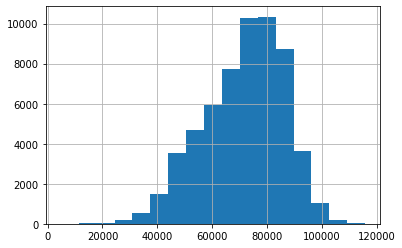

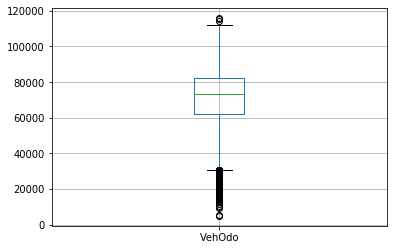

In [363]:
df["VehOdo"].hist(bins=binsN)
plt.show()
boxplot = df.boxplot(column=['VehOdo'])

In [364]:
#Seconod me non sono da considerare outliers
df.loc[df["VehOdo"]>110000]["VehOdo"].count()

8

In [365]:
df.loc[df["VehOdo"]>110000]["IsBadBuy"]

13514    1
30312    0
30711    0
35837    0
44125    1
45774    0
46083    1
50383    0
Name: IsBadBuy, dtype: int64

In [366]:
df.loc[df["VehOdo"]<20000]["VehOdo"].count()

34

In [367]:
#Anche questi sembrano valori possibili
df.loc[df["VehOdo"]<20000]["VehOdo"]

3272     16713
4478     12628
5072     15409
6704     19534
7931     19751
9085     16545
10768    15249
11298    15894
12564    17502
13225     9446
14153    17281
14838    18777
17193     5368
18204    15655
20948    11662
21080    19813
25743    18813
26388     9878
29061    10643
29758    19983
32333    17538
36187    14961
38651    19610
38767    13924
41054    14474
43117    12926
43551    19825
47212    14519
52250    16833
53207    13445
53937     4825
54746    18440
55431    19430
57321    14547
Name: VehOdo, dtype: int64

In [368]:
#costo dei veicoli con poche miglia
df.loc[df["VehOdo"]<20000]["VehBCost"]

3272      4900.00
4478      6435.00
5072     10402.89
6704      5800.00
7931      9350.00
9085      5210.00
10768     6160.00
11298     5610.00
12564    35900.00
13225    32300.00
14153     8000.00
14838     4740.00
17193     5315.00
18204     8200.00
20948    11393.09
21080     4600.00
25743     6035.00
26388     5100.00
29061     5935.00
29758     4000.00
32333     5600.00
36187     4900.00
38651     9387.14
38767    36485.00
41054     6755.00
43117     6465.00
43551     5605.00
47212     4710.00
52250     6000.00
53207    14796.57
53937      225.00
54746     5000.00
55431     5500.00
57321     5900.00
Name: VehBCost, dtype: float64

In [369]:
#Anno dei veicoli con poche miglia
df.loc[df["VehOdo"]<20000]["VehYear"]

3272     2004
4478     2007
5072     2007
6704     2003
7931     2007
9085     2006
10768    2006
11298    2006
12564    2008
13225    2009
14153    2004
14838    2004
17193    2003
18204    2004
20948    2007
21080    2004
25743    2007
26388    2006
29061    2008
29758    2002
32333    2004
36187    2002
38651    2008
38767    2008
41054    2004
43117    2007
43551    2004
47212    2003
52250    2007
53207    2008
53937    2007
54746    2002
55431    2004
57321    2005
Name: VehYear, dtype: int64

In [370]:
#controllo dei badbuy per le macchine con poche miglia
df.loc[df["VehOdo"]<20000]["IsBadBuy"]

3272     0
4478     0
5072     1
6704     0
7931     0
9085     1
10768    0
11298    0
12564    1
13225    1
14153    0
14838    0
17193    0
18204    0
20948    1
21080    0
25743    0
26388    0
29061    0
29758    0
32333    0
36187    1
38651    1
38767    1
41054    0
43117    0
43551    0
47212    0
52250    0
53207    1
53937    1
54746    0
55431    0
57321    0
Name: IsBadBuy, dtype: int64

In [371]:
#controllo del MMR 
df.loc[df["VehOdo"]<20000]["MMRAcquisitionAuctionAveragePrice"]

3272      4481.0
4478      5657.0
5072     16536.0
6704      2560.0
7931     10956.0
9085      4801.0
10768     5427.0
11298     4066.0
12564    35722.0
13225    27680.0
14153     4281.0
14838     2463.0
17193     2617.0
18204     4281.0
20948    19250.0
21080     4481.0
25743     5824.0
26388     3880.0
29061     6217.0
29758     2622.0
32333     2824.0
36187        0.0
38651    14539.0
38767    32063.0
41054     4800.0
43117     6324.0
43551     2941.0
47212     1683.0
52250     4995.0
53207    19546.0
53937     5498.0
54746     2622.0
55431     4481.0
57321     3641.0
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

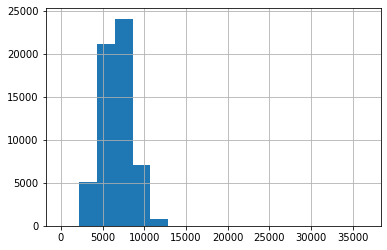

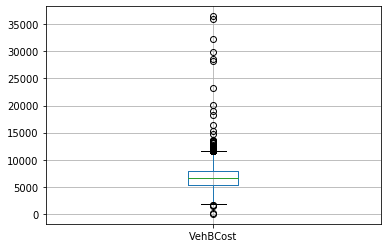

In [372]:
df["VehBCost"].hist(bins=binsN)
plt.show()
boxplot = df.boxplot(column=['VehBCost'])

In [373]:
df.loc[df["VehBCost"]>15000]["VehBCost"].count()

12

In [374]:
#controllo dei badbuy
df.loc[df["VehBCost"]>15000]["IsBadBuy"]

6380     1
6733     1
7380     1
12564    1
13225    1
15270    1
15491    1
19071    0
23109    1
32128    1
38767    1
53782    1
Name: IsBadBuy, dtype: int64

In [375]:
#controllo del MMR
df.loc[df["VehBCost"]>15000]["MMRAcquisitionAuctionAveragePrice"]

6380     28077.0
6733     23031.0
7380     18900.0
12564    35722.0
13225    27680.0
15270    15091.0
15491    28354.0
19071    14321.0
23109    23581.0
32128    20635.0
38767    32063.0
53782    25033.0
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [376]:
#Anno dei veicoli
df.loc[df["VehBCost"]>15000]["VehYear"]

6380     2007
6733     2007
7380     2007
12564    2008
13225    2009
15270    2006
15491    2008
19071    2007
23109    2007
32128    2008
38767    2008
53782    2007
Name: VehYear, dtype: int64

In [377]:
#poche miglia fatte
df.loc[df["VehBCost"]>15000]["VehOdo"]

6380     30945
6733     61001
7380     40023
12564    17502
13225     9446
15270    48250
15491    32556
19071    36292
23109    26113
32128    24878
38767    13924
53782    34534
Name: VehOdo, dtype: int64

In [378]:
#Asiatiche per la maggiorparte
df.loc[df["VehBCost"]>15000]["Nationality"]

6380     NOT AMERICA
6733     NOT AMERICA
7380     NOT AMERICA
12564    NOT AMERICA
13225       AMERICAN
15270    NOT AMERICA
15491    NOT AMERICA
19071    NOT AMERICA
23109    NOT AMERICA
32128    NOT AMERICA
38767    NOT AMERICA
53782    NOT AMERICA
Name: Nationality, dtype: object

In [379]:
#assicurazione bassa
df.loc[df["VehBCost"]>15000]["WarrantyCost"]

6380     1001
6733     1020
7380      764
12564     702
13225     941
15270     482
15491    1694
19071     762
23109    1121
32128     522
38767    1001
53782     522
Name: WarrantyCost, dtype: int64

In [380]:
wout = df.loc[df['Make']=='LEXUS']

wout.loc[df['VehBCost']>20000]




,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Engine,Trim,Transmission,...,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Model,Doors,SubModel
6380,69256,1,2009-04-12,ADESA,2007,2,LEXUS,NaN,NaN,AUTO,...,35366.0,16926,91752,CA,29795.0,0,1001,RX400H,4D,UTILITY SPORT
23109,6038,1,2010-11-23,MANHEIM,2007,3,LEXUS,NaN,NaN,AUTO,...,33337.0,835,85040,AZ,28560.0,0,1121,GS450H,4D,SEDAN
38767,15318,1,2010-05-26,MANHEIM,2008,2,LEXUS,NaN,NaN,AUTO,...,41062.0,835,94544,CA,36485.0,0,1001,RX400H,4D,UTILITY SPORT


In [381]:
df.loc[df["VehBCost"]<2000]["VehBCost"].count()

7

In [382]:
df.loc[df["VehBCost"]<1000]["VehBCost"]

40998      1.0
53937    225.0
Name: VehBCost, dtype: float64

In [383]:
df.loc[df["VehBCost"]<1000]["VehOdo"]

40998    102641
53937      4825
Name: VehOdo, dtype: int64

In [384]:
df.loc[df["VehBCost"]<1000]["IsBadBuy"]

40998    1
53937    1
Name: IsBadBuy, dtype: int64

In [385]:
df.loc[df["VehBCost"]<1000]["VehYear"]

40998    2001
53937    2007
Name: VehYear, dtype: int64

In [386]:
df.loc[df["VehBCost"]<1000]["MMRAcquisitionAuctionAveragePrice"]

40998    2411.0
53937    5498.0
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [387]:
#Sostituzione dei valori nulli del submodel utilizzando la moda raggruppata per modello e anno
df['SubModel'] = df['SubModel'].groupby([df['Model'], df['VehYear']]).fillna(df['SubModel'].mode()[0])

In [388]:
df['SubModel'].isnull().sum()

0

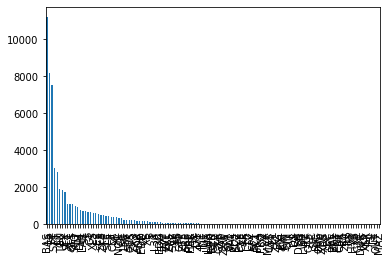

In [389]:
df["Trim"].value_counts().plot(kind="bar")

In [390]:
#Sostituzione dei valori nulli del trim utilizzando la moda raggruppata per modello sottomodello e anno
df['Trim'] = df['Trim'].groupby([df['Model'], df['SubModel'], df['VehYear']]).fillna(df['Trim'].mode()[0])

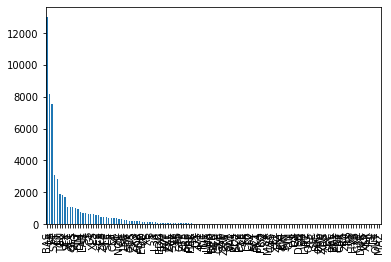

In [391]:
#problema aumenta di molto il numero di modelli bas
df["Trim"].value_counts().plot(kind="bar")

In [392]:
df["Trim"].isnull().sum()

0

In [393]:
#Sostituzione dei valori nulli della trasmissione utilizzando la moda raggruppata per modello sottomodello e anno
df['Transmission'] = df['Transmission'].groupby([df['Model'], df['SubModel'], df['VehYear']]).fillna(df['Transmission'].mode()[0])

In [394]:
df["Transmission"].isnull().sum()

0

In [395]:
#Sostituzione dei valori nulli della trasmissione utilizzando la moda raggruppata per modello sottomodello e Trim
df['WheelTypeID'] = df['WheelTypeID'].groupby([df['Model'], df['SubModel'], df['Trim']]).fillna(df['WheelTypeID'].mode()[0])

In [396]:
df['WheelTypeID'].isnull().sum()

0

In [397]:
df['Nationality'] = df['Nationality'].groupby([df['Make']]).fillna(df['Nationality'].mode()[0])

In [398]:
df['Nationality'].isnull().sum()

0

In [399]:
df['Size'] = df['Size'].groupby([df['Model'], df['SubModel'], df['VehYear']]).fillna(df['Size'].mode()[0])

In [400]:
df['Size'].isnull().sum()

0

In [401]:
#attributo eliminato
#df['TopThreeAmericanName'] = df['TopThreeAmericanName'].groupby([df['Make']]).fillna(df['TopThreeAmericanName'].mode()[0])

In [402]:
#df['TopThreeAmericanName'].isnull().sum()

In [403]:
def fun_temp(x):
    return x.fillna(x.mean())

In [404]:
df['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan, inplace=True)

In [405]:
df['MMRAcquisitionAuctionAveragePrice'].isnull().sum()

661

In [406]:
binsN=math.ceil(math.log(df.shape[0],2))+1

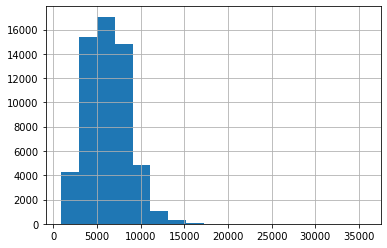

In [407]:
df['MMRAcquisitionAuctionAveragePrice'].hist(bins=binsN)
plt.show()

In [408]:
(df['MMRAcquisitionAuctionAveragePrice'].groupby([df['Model'], df['SubModel'], df['VehYear']])).mean()

Model     SubModel  VehYear
1500 RAM  EXT CAB   2001        2900.000000
          MEGA CAB  2006       12973.666667
          QUAD CAB  2002        5462.893617
                    2003        6755.850000
                    2004        6937.096618
                                   ...     
YUKON XL  UTILITY   2002        6193.400000
                    2003        7478.619048
                    2004        9174.166667
                    2005        8601.000000
ZEPHYR    SEDAN     2006       12168.666667
Name: MMRAcquisitionAuctionAveragePrice, Length: 1388, dtype: float64

In [409]:
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

In [410]:
df['MMRAcquisitionAuctionAveragePrice'].isnull().sum()

16

In [411]:
dig = df[df['MMRAcquisitionAuctionAveragePrice'].isnull()]   

In [412]:
(dig['MMRAcquisitionAuctionAveragePrice'].groupby([dig['Model'], dig['SubModel']])).mean().isnull().sum()

13

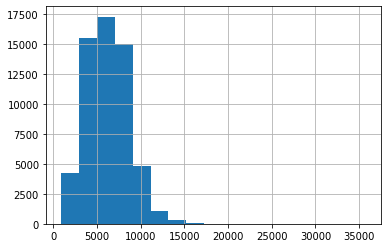

In [413]:
df['MMRAcquisitionAuctionAveragePrice'].hist(bins=binsN)
plt.show()

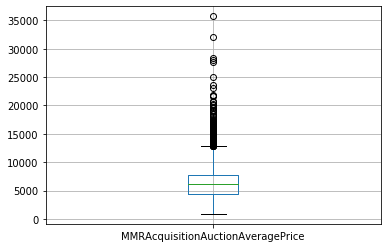

In [414]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionAveragePrice'])

In [415]:
df.loc[df["MMRAcquisitionAuctionAveragePrice"]<1000]["MMRAcquisitionAuctionAveragePrice"].count()

2

In [416]:
df.loc[df["MMRAcquisitionAuctionAveragePrice"]<1000]["MMRAcquisitionAuctionAveragePrice"]

31127    966.0
35923    884.0
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [417]:
#Sono tutte macchine casuali di qualsiasi modello, miglia fatte vedere l'output
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["MMRAcquisitionAuctionAveragePrice"].count()

15

In [418]:
#controllo miglia fatte veicoli ccon MMR alto
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["VehOdo"]

5691     42686
6380     30945
6733     61001
11498    44163
12564    17502
13225     9446
15491    32556
23109    26113
28508    72041
32128    24878
36887    47227
38767    13924
42283    61587
53782    34534
54862    24125
Name: VehOdo, dtype: int64

In [419]:
#Molte hanno un prezzo elevato
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["VehBCost"]

5691     13070.02
6380     29795.00
6733     20100.00
11498    11727.64
12564    35900.00
13225    32300.00
15491    28180.00
23109    28560.00
28508    11500.00
32128    15299.88
36887    13509.79
38767    36485.00
42283    12812.00
53782    23272.02
54862    11527.00
Name: VehBCost, dtype: float64

In [420]:
#Tutte BadBuy tranne una
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["IsBadBuy"]

5691     1
6380     1
6733     1
11498    1
12564    1
13225    1
15491    1
23109    1
28508    0
32128    1
36887    1
38767    1
42283    1
53782    1
54862    1
Name: IsBadBuy, dtype: int64

In [421]:
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["MMRCurrentAuctionAveragePrice"]

5691     19241.0
6380     27543.0
6733     21940.0
11498    18416.0
12564    35722.0
13225    27795.0
15491    28099.0
23109    23400.0
28508    21837.0
32128    19359.0
36887    20129.0
38767    31127.0
42283    19871.0
53782    23015.0
54862    18546.0
Name: MMRCurrentAuctionAveragePrice, dtype: float64

In [422]:
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["MMRAcquisitionAuctionAveragePrice"]

6380     28077.0
6733     23031.0
12564    35722.0
13225    27680.0
15491    28354.0
23109    23581.0
28508    20238.0
36887    21599.0
38767    32063.0
53207    19546.0
53782    25033.0
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [423]:
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["MMRAcquisitionRetailAveragePrice"]

5691     24797.0
6380     33872.0
6733     27295.0
11498    23840.0
12564    39080.0
13225    31599.0
15491    30196.0
23109    29269.0
28508    22357.0
32128    22786.0
36887    26351.0
38767    37885.0
42283    26643.0
53782    30048.0
54862    24120.0
Name: MMRAcquisitionRetailAveragePrice, dtype: float64

In [424]:
df.loc[df["MMRAcquisitionRetailAveragePrice"]>22373]["MMRAcquisitionAuctionAveragePrice"]

5691     20156.0
6380     28077.0
6733     23031.0
7380     18900.0
11498    21611.0
12564    35722.0
13225    27680.0
15491    28354.0
23109    23581.0
24014    19281.0
24068    16667.0
32128    20635.0
36887    21599.0
38767    32063.0
42283    20797.0
45761    18171.0
50845    17494.0
53207    19546.0
53782    25033.0
54862    21870.0
56605    18970.0
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [425]:
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["MMRCurrentRetailAveragePrice"]

5691     23951.0
6380     32928.0
6733     27269.0
11498    23327.0
12564    39080.0
13225    31128.0
15491    29921.0
23109    29752.0
28508    24084.0
32128    24501.0
36887    24223.0
38767    38151.0
42283    24150.0
53782    28050.0
54862    22581.0
Name: MMRCurrentRetailAveragePrice, dtype: float64

In [426]:
df.loc[df["MMRCurrentRetailAveragePrice"]>22581]["MMRAcquisitionAuctionAveragePrice"]

5691     20156.0
6380     28077.0
6733     23031.0
11498    21611.0
12564    35722.0
13225    27680.0
13787    19810.0
15491    28354.0
23109    23581.0
24014    19281.0
28508    20238.0
32128    20635.0
36887    21599.0
37458    17570.0
38767    32063.0
42283    20797.0
45045    18075.0
45761    18171.0
50845    17494.0
53207    19546.0
53782    25033.0
56605    18970.0
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [427]:
#veicoli nuovi
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["VehYear"]

5691     2006
6380     2007
6733     2007
11498    2006
12564    2008
13225    2009
15491    2008
23109    2007
28508    2007
32128    2008
36887    2006
38767    2008
42283    2007
53782    2007
54862    2007
Name: VehYear, dtype: int64

In [428]:
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["Auction"]

5691     MANHEIM
6380       ADESA
6733     MANHEIM
11498    MANHEIM
12564    MANHEIM
13225    MANHEIM
15491    MANHEIM
23109    MANHEIM
28508    MANHEIM
32128      OTHER
36887    MANHEIM
38767    MANHEIM
42283    MANHEIM
53782      ADESA
54862      ADESA
Name: Auction, dtype: object

In [429]:
#Asiatiche
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["Nationality"]

5691     NOT AMERICA
6380     NOT AMERICA
6733     NOT AMERICA
11498    NOT AMERICA
12564    NOT AMERICA
13225       AMERICAN
15491    NOT AMERICA
23109    NOT AMERICA
28508    NOT AMERICA
32128    NOT AMERICA
36887    NOT AMERICA
38767    NOT AMERICA
42283       AMERICAN
53782    NOT AMERICA
54862    NOT AMERICA
Name: Nationality, dtype: object

In [430]:
#assicurazione economica
df.loc[df["MMRAcquisitionAuctionAveragePrice"]>20000]["WarrantyCost"]

5691      764
6380     1001
6733     1020
11498     764
12564     702
13225     941
15491    1694
23109    1121
28508    2091
32128     522
36887    1187
38767    1001
42283    1313
53782     522
54862     702
Name: WarrantyCost, dtype: int64

In [431]:
df.loc[df["MMRAcquisitionAuctionAveragePrice"]<1300]["MMRAcquisitionAuctionAveragePrice"]

405      1281.0
3928     1252.0
4643     1180.0
5365     1010.0
5702     1186.0
5996     1249.0
16973    1064.0
17642    1281.0
17738    1205.0
18699    1120.0
23594    1286.0
28341    1027.0
29359    1239.0
30530    1272.0
31127     966.0
31531    1249.0
33607    1175.0
35833    1178.0
35923     884.0
50911    1146.0
56756    1262.0
56803    1004.0
58310    1097.0
58385    1252.0
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [432]:
df['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan, inplace=True)

In [433]:
df['MMRAcquisitionAuctionCleanPrice'].isnull().sum()

565

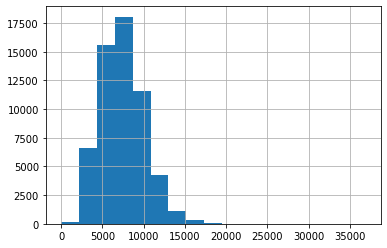

In [434]:
df['MMRAcquisitionAuctionCleanPrice'].hist(bins=binsN)
plt.show()

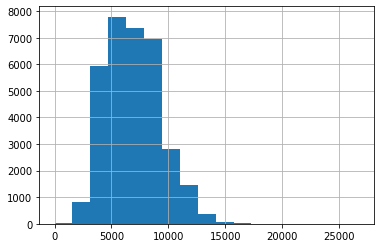

In [435]:
df[df['SubModel'] == 'SEDAN']['MMRAcquisitionAuctionCleanPrice'].hist(bins=binsN)
plt.show()

In [436]:
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

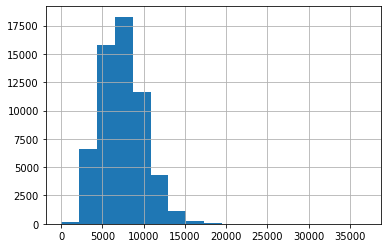

In [437]:
df['MMRAcquisitionAuctionCleanPrice'].hist(bins=binsN)
plt.show()

In [438]:
df['MMRAcquisitionAuctionCleanPrice'].isnull().sum()

14

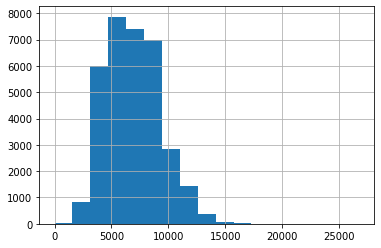

In [439]:
df[df['SubModel'] == 'SEDAN']['MMRAcquisitionAuctionCleanPrice'].hist(bins=binsN)
plt.show()

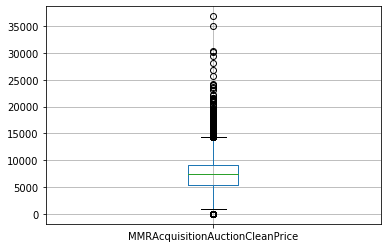

In [440]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionCleanPrice'])

In [441]:
df.loc[df["MMRAcquisitionAuctionCleanPrice"]<2]["MMRAcquisitionAuctionCleanPrice"].count()

96

In [442]:
controllo = df.loc[df["MMRAcquisitionAuctionCleanPrice"]<2]

In [443]:
df.loc[df["MMRAcquisitionAuctionCleanPrice"]<2]["MMRAcquisitionAuctionCleanPrice"]

924      1.0
1347     1.0
1778     1.0
3483     1.0
4552     1.0
        ... 
57688    1.0
57729    1.0
58061    1.0
58093    1.0
58105    1.0
Name: MMRAcquisitionAuctionCleanPrice, Length: 96, dtype: float64

In [444]:
df.loc[df["MMRCurrentAuctionCleanPrice"]<2]["MMRCurrentAuctionCleanPrice"].count()

393

In [445]:
df.loc[df["MMRCurrentAuctionCleanPrice"]<2]["MMRCurrentAuctionCleanPrice"]

233      0.0
458      0.0
777      0.0
835      0.0
924      1.0
        ... 
58093    1.0
58105    1.0
58186    0.0
58261    0.0
58307    0.0
Name: MMRCurrentAuctionCleanPrice, Length: 393, dtype: float64

In [446]:
controllo.loc[controllo["MMRCurrentAuctionCleanPrice"]<2]["MMRCurrentAuctionCleanPrice"].count()

86

In [447]:
df['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan, inplace=True)

In [448]:
df['MMRAcquisitionAuctionCleanPrice'].isnull().sum()

110

In [449]:
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

In [450]:
df['MMRAcquisitionAuctionCleanPrice'].isnull().sum()

16

In [451]:
df['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan, inplace=True)

In [452]:
df['MMRAcquisitionRetailAveragePrice'].isnull().sum()

661

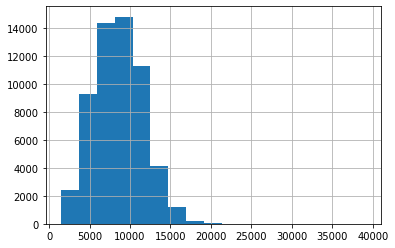

In [453]:
df['MMRAcquisitionRetailAveragePrice'].hist(bins=binsN)
plt.show()

In [454]:
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

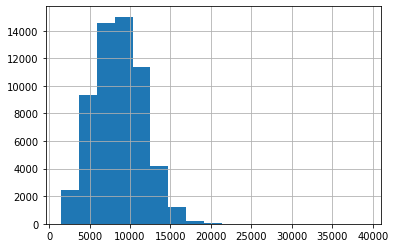

In [455]:
df['MMRAcquisitionRetailAveragePrice'].hist(bins=binsN)
plt.show()

In [456]:
df['MMRAcquisitionRetailAveragePrice'].isnull().sum()

16

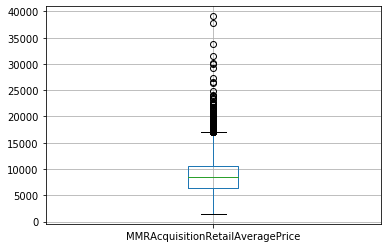

In [457]:
boxplot = df.boxplot(column=['MMRAcquisitionRetailAveragePrice'])

In [458]:
df.loc[df["MMRAcquisitionRetailAveragePrice"]<1000]["MMRAcquisitionRetailAveragePrice"].count()

0

In [459]:
df['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan, inplace=True)
df['MMRAcquisitonRetailCleanPrice'].isnull().sum()

661

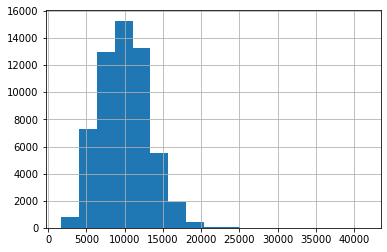

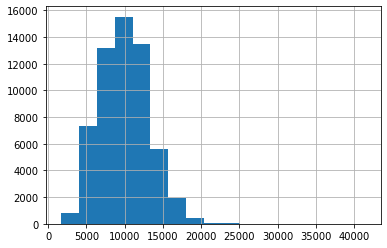

In [460]:
df['MMRAcquisitonRetailCleanPrice'].hist(bins=binsN)
plt.show()

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

df['MMRAcquisitonRetailCleanPrice'].hist(bins=binsN)
plt.show()

In [461]:
df['MMRAcquisitonRetailCleanPrice'].isnull().sum()

16

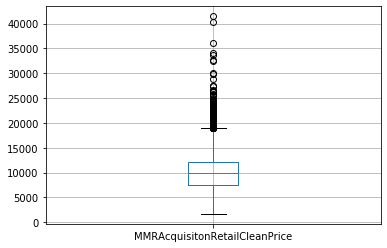

In [462]:
boxplot = df.boxplot(column=['MMRAcquisitonRetailCleanPrice'])

In [463]:
df.loc[df["MMRAcquisitonRetailCleanPrice"]<1000]["MMRAcquisitonRetailCleanPrice"].count()

0

In [464]:
df['MMRCurrentAuctionAveragePrice'].replace(0, np.nan, inplace=True)
df['MMRCurrentAuctionAveragePrice'].isnull().sum()

638

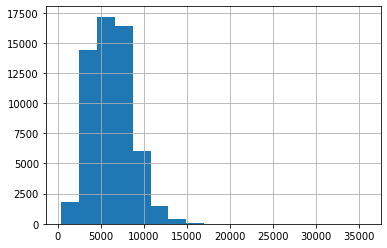

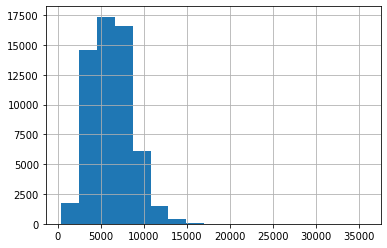

In [465]:
df['MMRCurrentAuctionAveragePrice'].hist(bins=binsN)
plt.show()

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

df['MMRCurrentAuctionAveragePrice'].hist(bins=binsN)
plt.show()

In [466]:
df['MMRCurrentAuctionAveragePrice'].isnull().sum()

16

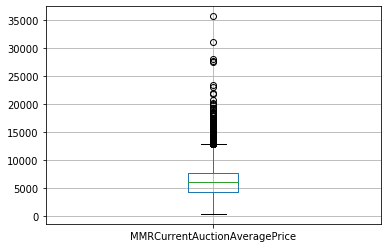

In [467]:
boxplot = df.boxplot(column=['MMRCurrentAuctionAveragePrice'])

In [468]:
df.loc[df["MMRCurrentAuctionAveragePrice"]<1000]["MMRCurrentAuctionAveragePrice"].count()

15

In [469]:
df.loc[df["MMRCurrentAuctionAveragePrice"]<1000]["MMRCurrentAuctionAveragePrice"]

138      665.0
2917     665.0
5365     809.0
17588    430.0
17807    806.0
18167    369.0
26815    809.0
28341    937.0
29359    847.0
34755    733.0
35923    896.0
49074    433.0
52996    912.0
56202    727.0
56756    879.0
Name: MMRCurrentAuctionAveragePrice, dtype: float64

In [470]:
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["MMRCurrentAuctionAveragePrice"].count()

11

In [471]:
#molte utility sport
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["SubModel"]

6380     UTILITY SPORT
6733             SEDAN
12564    UTILITY SPORT
13225         CREW CAB
15491    UTILITY SPORT
23109            SEDAN
28508         CREW CAB
36887    UTILITY SPORT
38767    UTILITY SPORT
53207            SEDAN
53782         CREW CAB
Name: SubModel, dtype: object

In [472]:
#quasi tutti badbuy
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["IsBadBuy"]

6380     1
6733     1
12564    1
13225    1
15491    1
23109    1
28508    0
36887    1
38767    1
53207    1
53782    1
Name: IsBadBuy, dtype: int64

In [473]:
#le piu nuove
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["VehYear"]

6380     2007
6733     2007
12564    2008
13225    2009
15491    2008
23109    2007
28508    2007
36887    2006
38767    2008
53207    2008
53782    2007
Name: VehYear, dtype: int64

In [474]:
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["Auction"]

6380       ADESA
6733     MANHEIM
12564    MANHEIM
13225    MANHEIM
15491    MANHEIM
23109    MANHEIM
28508    MANHEIM
36887    MANHEIM
38767    MANHEIM
53207    MANHEIM
53782      ADESA
Name: Auction, dtype: object

In [475]:
#Assicurazione economica
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["WarrantyCost"]

6380     1001
6733     1020
12564     702
13225     941
15491    1694
23109    1121
28508    2091
36887    1187
38767    1001
53207    1121
53782     522
Name: WarrantyCost, dtype: int64

In [476]:
#asiatiche
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["Nationality"]

6380     NOT AMERICA
6733     NOT AMERICA
12564    NOT AMERICA
13225       AMERICAN
15491    NOT AMERICA
23109    NOT AMERICA
28508    NOT AMERICA
36887    NOT AMERICA
38767    NOT AMERICA
53207       AMERICAN
53782    NOT AMERICA
Name: Nationality, dtype: object

In [477]:
df.loc[df["MMRCurrentAuctionAveragePrice"]>20000]["IsOnlineSale"]

6380     0
6733     0
12564    0
13225    0
15491    0
23109    0
28508    0
36887    0
38767    0
53207    0
53782    0
Name: IsOnlineSale, dtype: int64

In [478]:
df.loc[df["MMRCurrentAuctionAveragePrice"]<1000]["MMRCurrentAuctionAveragePrice"]

138      665.0
2917     665.0
5365     809.0
17588    430.0
17807    806.0
18167    369.0
26815    809.0
28341    937.0
29359    847.0
34755    733.0
35923    896.0
49074    433.0
52996    912.0
56202    727.0
56756    879.0
Name: MMRCurrentAuctionAveragePrice, dtype: float64

In [479]:
df['MMRCurrentAuctionCleanPrice'].replace(0, np.nan, inplace=True)
df['MMRCurrentAuctionCleanPrice'].isnull().sum()

545

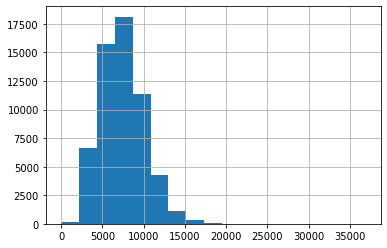

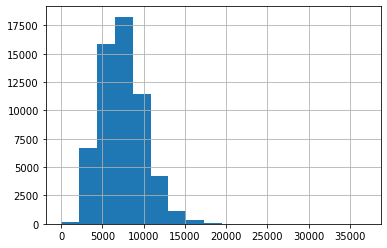

In [480]:
df['MMRCurrentAuctionCleanPrice'].hist(bins=binsN)
plt.show()

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

df['MMRCurrentAuctionCleanPrice'].hist(bins=binsN)
plt.show()

In [481]:
df['MMRCurrentAuctionCleanPrice'].isnull().sum()

14

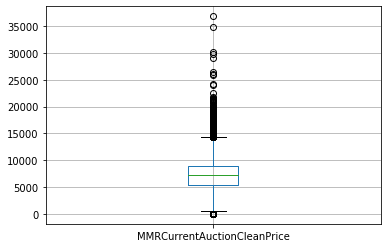

In [482]:
boxplot = df.boxplot(column=['MMRCurrentAuctionCleanPrice'])

In [483]:
df.loc[df["MMRCurrentAuctionCleanPrice"]<2]["MMRCurrentAuctionCleanPrice"].count()

93

In [484]:
df.loc[df["MMRCurrentAuctionCleanPrice"]<2]["MMRCurrentAuctionCleanPrice"]

924      1.0
1347     1.0
1778     1.0
3483     1.0
4552     1.0
        ... 
57688    1.0
57729    1.0
58061    1.0
58093    1.0
58105    1.0
Name: MMRCurrentAuctionCleanPrice, Length: 93, dtype: float64

In [485]:
df['MMRCurrentAuctionCleanPrice'].replace(1, np.nan, inplace=True)
df['MMRCurrentAuctionCleanPrice'].isnull().sum()

107

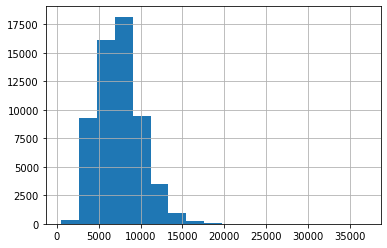

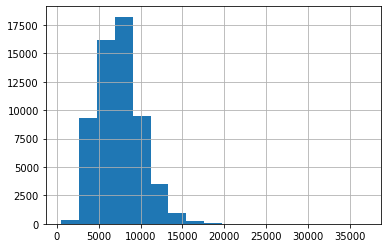

In [486]:
df['MMRCurrentAuctionCleanPrice'].hist(bins=binsN)
plt.show()

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

df['MMRCurrentAuctionCleanPrice'].hist(bins=binsN)
plt.show()

In [487]:
df['MMRCurrentAuctionCleanPrice'].isnull().sum()

16

In [488]:
df['MMRCurrentRetailAveragePrice'].replace(0, np.nan, inplace=True)
df['MMRCurrentRetailAveragePrice'].isnull().sum()

638

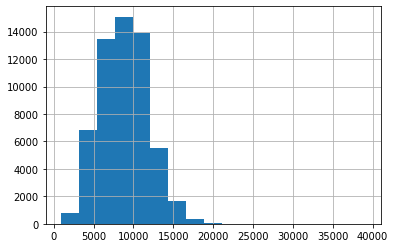

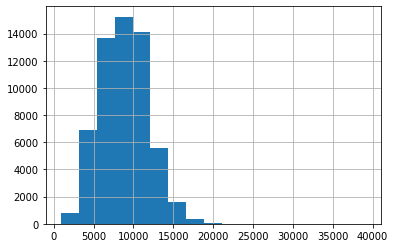

In [489]:
df['MMRCurrentRetailAveragePrice'].hist(bins=binsN)
plt.show()

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

df['MMRCurrentRetailAveragePrice'].hist(bins=binsN)
plt.show()

In [490]:
df['MMRCurrentRetailAveragePrice'].isnull().sum()

16

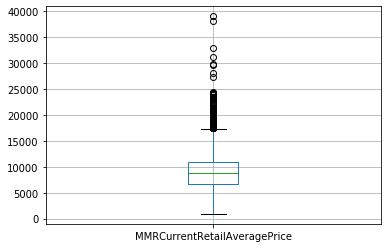

In [491]:
boxplot = df.boxplot(column=['MMRCurrentRetailAveragePrice'])

In [492]:
df.loc[df["MMRCurrentRetailAveragePrice"]<1000]["MMRCurrentRetailAveragePrice"].count()

3

In [493]:
df.loc[df["MMRCurrentRetailAveragePrice"]<1000]["MMRCurrentRetailAveragePrice"]

17588    964.0
18167    899.0
49074    968.0
Name: MMRCurrentRetailAveragePrice, dtype: float64

In [494]:
df['MMRCurrentRetailCleanPrice'].replace(0, np.nan, inplace=True)
df['MMRCurrentRetailCleanPrice'].isnull().sum()

638

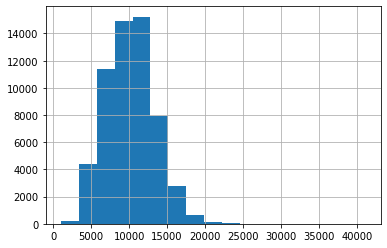

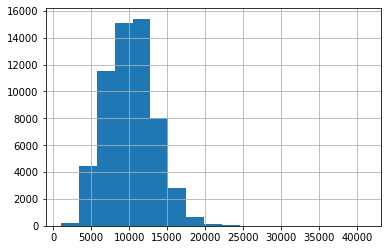

In [495]:
df['MMRCurrentRetailCleanPrice'].hist(bins=binsN)
plt.show()

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([df['Model'], df['SubModel'], df['VehYear']]).apply(fun_temp)

df['MMRCurrentRetailCleanPrice'].hist(bins=binsN)
plt.show()

In [496]:
df['MMRCurrentRetailCleanPrice'].isnull().sum()

16

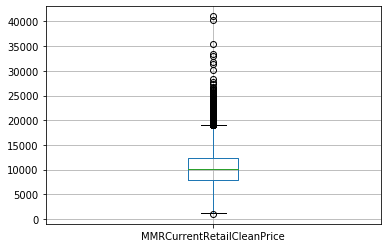

In [497]:
boxplot = df.boxplot(column=['MMRCurrentRetailCleanPrice'])

In [498]:
df.loc[df["MMRCurrentRetailCleanPrice"]<1000]["MMRCurrentRetailCleanPrice"].count()

0

In [499]:
df.isnull().sum()  

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Engine                               19582
Trim                                     0
Transmission                             0
WheelTypeID                              0
VehOdo                                   0
Nationality                              0
Size                                     0
MMRAcquisitionAuctionAveragePrice       16
MMRAcquisitionAuctionCleanPrice         16
MMRAcquisitionRetailAveragePrice        16
MMRAcquisitonRetailCleanPrice           16
MMRCurrentAuctionAveragePrice           16
MMRCurrentAuctionCleanPrice             16
MMRCurrentRetailAveragePrice            16
MMRCurrentRetailCleanPrice              16
BYRNO                                    0
VNZIP1     

In [500]:
dig['MMRAcquisitionAuctionCleanPrice']

1303     NaN
1306     0.0
8590     0.0
11261    0.0
15769    0.0
20567    0.0
20958    0.0
22829    0.0
26061    1.0
28087    0.0
28494    0.0
33996    0.0
35577    1.0
42553    0.0
46710    0.0
56572    0.0
Name: MMRAcquisitionAuctionCleanPrice, dtype: float64

In [501]:
dig = df[df['MMRAcquisitionRetailAveragePrice'].isnull()]

In [502]:
dig['MMRAcquisitionRetailAveragePrice']

1303    NaN
1306    NaN
8590    NaN
11261   NaN
15769   NaN
20567   NaN
20958   NaN
22829   NaN
26061   NaN
28087   NaN
28494   NaN
33996   NaN
35577   NaN
42553   NaN
46710   NaN
56572   NaN
Name: MMRAcquisitionRetailAveragePrice, dtype: float64

In [503]:
dig['MMRAcquisitonRetailCleanPrice']

1303    NaN
1306    NaN
8590    NaN
11261   NaN
15769   NaN
20567   NaN
20958   NaN
22829   NaN
26061   NaN
28087   NaN
28494   NaN
33996   NaN
35577   NaN
42553   NaN
46710   NaN
56572   NaN
Name: MMRAcquisitonRetailCleanPrice, dtype: float64

In [504]:
dig['MMRCurrentAuctionAveragePrice']

1303         NaN
1306         NaN
8590         NaN
11261     8238.0
15769        NaN
20567        NaN
20958        NaN
22829        NaN
26061        NaN
28087        NaN
28494        NaN
33996    10775.0
35577        NaN
42553        NaN
46710        NaN
56572        NaN
Name: MMRCurrentAuctionAveragePrice, dtype: float64

In [505]:
dig['MMRCurrentAuctionCleanPrice']

1303         NaN
1306         NaN
8590         NaN
11261     9636.0
15769        NaN
20567        NaN
20958        NaN
22829        NaN
26061        NaN
28087        NaN
28494        NaN
33996    14136.0
35577        NaN
42553        NaN
46710        NaN
56572        NaN
Name: MMRCurrentAuctionCleanPrice, dtype: float64

In [506]:
dig['MMRCurrentRetailAveragePrice']

1303         NaN
1306         NaN
8590         NaN
11261    12490.0
15769        NaN
20567        NaN
20958        NaN
22829        NaN
26061        NaN
28087        NaN
28494        NaN
33996    14285.0
35577        NaN
42553        NaN
46710        NaN
56572        NaN
Name: MMRCurrentRetailAveragePrice, dtype: float64

In [507]:
dig['MMRCurrentRetailCleanPrice']

1303         NaN
1306         NaN
8590         NaN
11261    13847.0
15769        NaN
20567        NaN
20958        NaN
22829        NaN
26061        NaN
28087        NaN
28494        NaN
33996    18486.0
35577        NaN
42553        NaN
46710        NaN
56572        NaN
Name: MMRCurrentRetailCleanPrice, dtype: float64

In [508]:
dig

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Engine,Trim,Transmission,...,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Model,Doors,SubModel
1303,36536,0,2009-10-14,MANHEIM,2007,2,JEEP,NaN,SPO,AUTO,...,NaN,22808,75236,TX,10750.0,0,1801,COMMANDER,NaN,BASE
1306,63707,0,2009-06-24,ADESA,2008,1,DODGE,5.7L,ST,AUTO,...,NaN,20234,85226,AZ,12045.0,0,825,2500 RAM,NaN,QUAD CAB
8590,50762,0,2010-01-29,MANHEIM,2006,4,FORD,NaN,ZX5,AUTO,...,NaN,18822,78219,TX,6625.0,0,762,FOCUS,4D,HATCHBACK
11261,68239,0,2009-03-09,ADESA,2005,4,GMC,3.5L,SL,AUTO,...,13847.0,3453,80817,CO,9000.0,0,803,CANYON,NaN,EXT CAB
15769,10897,0,2009-10-19,MANHEIM,2002,7,GMC,NaN,SL,AUTO,...,NaN,16044,27542,NC,7500.0,0,1455,SIERRA,NaN,BASE
20567,18554,0,2009-03-13,OTHER,2006,3,DODGE,NaN,SE,AUTO,...,NaN,20740,29461,SC,4800.0,0,1763,CARAVAN,NaN,BASE
20958,38392,1,2010-10-20,MANHEIM,2003,7,SUZUKI,NaN,JLS,AUTO,...,NaN,52598,75236,TX,5870.0,0,1455,GRAND VITARA,4D,HARDTOP
22829,4928,0,2009-05-26,MANHEIM,2002,7,CHEVROLET,8.1L,LS,AUTO,...,NaN,835,85040,AZ,8290.0,0,1320,2500HD SILVERADO,NaN,EXT CAB
26061,71289,0,2009-12-02,ADESA,2006,3,CHEVROLET,5.3L,150,AUTO,...,NaN,17675,28273,NC,10255.0,0,1623,SUBURBAN,4D,UTILITY
28087,15374,0,2010-04-08,MANHEIM,2006,4,FORD,NaN,ZX5,AUTO,...,NaN,835,94544,CA,5800.0,0,1243,FOCUS,4D,HATCHBACK


In [509]:
dig = df[df['MMRCurrentRetailAveragePrice'].isnull()]

In [510]:
dig['MMRAcquisitionAuctionAveragePrice']

233      9750.0
1303        NaN
1306        NaN
8590        NaN
15769       NaN
20567       NaN
20958       NaN
22829       NaN
26061       NaN
28087       NaN
28494       NaN
35577       NaN
37242    8865.0
42553       NaN
46710       NaN
56572       NaN
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [511]:
dig['MMRAcquisitionAuctionCleanPrice']

233      10955.0
1303         NaN
1306         NaN
8590         NaN
15769        NaN
20567        NaN
20958        NaN
22829        NaN
26061        NaN
28087        NaN
28494        NaN
35577        NaN
37242     9821.0
42553        NaN
46710        NaN
56572        NaN
Name: MMRAcquisitionAuctionCleanPrice, dtype: float64

In [512]:
dig['MMRAcquisitionRetailAveragePrice']

233      13537.0
1303         NaN
1306         NaN
8590         NaN
15769        NaN
20567        NaN
20958        NaN
22829        NaN
26061        NaN
28087        NaN
28494        NaN
35577        NaN
37242    12846.0
42553        NaN
46710        NaN
56572        NaN
Name: MMRAcquisitionRetailAveragePrice, dtype: float64

In [513]:
dig['MMRAcquisitonRetailCleanPrice']

233      14381.0
1303         NaN
1306         NaN
8590         NaN
15769        NaN
20567        NaN
20958        NaN
22829        NaN
26061        NaN
28087        NaN
28494        NaN
35577        NaN
37242    13878.0
42553        NaN
46710        NaN
56572        NaN
Name: MMRAcquisitonRetailCleanPrice, dtype: float64

In [514]:
dig['MMRCurrentRetailAveragePrice']

233     NaN
1303    NaN
1306    NaN
8590    NaN
15769   NaN
20567   NaN
20958   NaN
22829   NaN
26061   NaN
28087   NaN
28494   NaN
35577   NaN
37242   NaN
42553   NaN
46710   NaN
56572   NaN
Name: MMRCurrentRetailAveragePrice, dtype: float64

In [515]:
dig['MMRCurrentRetailCleanPrice']

233     NaN
1303    NaN
1306    NaN
8590    NaN
15769   NaN
20567   NaN
20958   NaN
22829   NaN
26061   NaN
28087   NaN
28494   NaN
35577   NaN
37242   NaN
42553   NaN
46710   NaN
56572   NaN
Name: MMRCurrentRetailCleanPrice, dtype: float64

In [516]:
dig

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Engine,Trim,Transmission,...,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Model,Doors,SubModel
233,42613,1,2010-07-10,MANHEIM,2007,3,ISUZU,5C,BAS,AUTO,...,NaN,18880,29532,SC,8985.0,0,1313,I-370,NaN,CREW CAB
1303,36536,0,2009-10-14,MANHEIM,2007,2,JEEP,NaN,SPO,AUTO,...,NaN,22808,75236,TX,10750.0,0,1801,COMMANDER,NaN,BASE
1306,63707,0,2009-06-24,ADESA,2008,1,DODGE,5.7L,ST,AUTO,...,NaN,20234,85226,AZ,12045.0,0,825,2500 RAM,NaN,QUAD CAB
8590,50762,0,2010-01-29,MANHEIM,2006,4,FORD,NaN,ZX5,AUTO,...,NaN,18822,78219,TX,6625.0,0,762,FOCUS,4D,HATCHBACK
15769,10897,0,2009-10-19,MANHEIM,2002,7,GMC,NaN,SL,AUTO,...,NaN,16044,27542,NC,7500.0,0,1455,SIERRA,NaN,BASE
20567,18554,0,2009-03-13,OTHER,2006,3,DODGE,NaN,SE,AUTO,...,NaN,20740,29461,SC,4800.0,0,1763,CARAVAN,NaN,BASE
20958,38392,1,2010-10-20,MANHEIM,2003,7,SUZUKI,NaN,JLS,AUTO,...,NaN,52598,75236,TX,5870.0,0,1455,GRAND VITARA,4D,HARDTOP
22829,4928,0,2009-05-26,MANHEIM,2002,7,CHEVROLET,8.1L,LS,AUTO,...,NaN,835,85040,AZ,8290.0,0,1320,2500HD SILVERADO,NaN,EXT CAB
26061,71289,0,2009-12-02,ADESA,2006,3,CHEVROLET,5.3L,150,AUTO,...,NaN,17675,28273,NC,10255.0,0,1623,SUBURBAN,4D,UTILITY
28087,15374,0,2010-04-08,MANHEIM,2006,4,FORD,NaN,ZX5,AUTO,...,NaN,835,94544,CA,5800.0,0,1243,FOCUS,4D,HATCHBACK


In [517]:
df = df.dropna(subset=['MMRAcquisitionAuctionAveragePrice'])
df['MMRAcquisitionAuctionAveragePrice'].isnull().sum()

0

In [518]:
df['MMRAcquisitionAuctionCleanPrice'].isnull().sum()

0

In [519]:
df['MMRAcquisitionRetailAveragePrice'].isnull().sum()

0

In [520]:
df['MMRAcquisitonRetailCleanPrice'].isnull().sum()

0

In [521]:
df = df.dropna(subset=['MMRCurrentAuctionAveragePrice'])
df['MMRCurrentAuctionAveragePrice'].isnull().sum()

0

In [522]:
df['MMRCurrentAuctionCleanPrice'].isnull().sum()

0

In [523]:
df['MMRCurrentRetailAveragePrice'].isnull().sum()

0

In [524]:
df['MMRCurrentRetailCleanPrice'].isnull().sum()

0

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58368 entries, 0 to 58385
Data columns (total 31 columns):
RefId                                58368 non-null int64
IsBadBuy                             58368 non-null int64
PurchDate                            58368 non-null object
Auction                              58368 non-null object
VehYear                              58368 non-null int64
VehicleAge                           58368 non-null int64
Make                                 58368 non-null object
Engine                               38795 non-null object
Trim                                 58368 non-null object
Transmission                         58368 non-null object
WheelTypeID                          58368 non-null float64
VehOdo                               58368 non-null int64
Nationality                          58368 non-null object
Size                                 58368 non-null object
MMRAcquisitionAuctionAveragePrice    58368 non-null float64
MMRAcquis

In [323]:
df.to_csv(path_or_buf='trainingsetnomissingvalue.csv' ,index=False)